# Importação das bibliotecas

In [1]:
import pandas as pd

from my_functions import MyFunctions
mf = MyFunctions()

pd.set_option('display.max_columns', None) # Para mostrar todas as colunas de um dataframe

# Preparação dos dados

In [2]:
# Carregando o dataset

dataset_name = 'dataset_churn.csv'
df = pd.read_csv(dataset_name, sep = ',')

In [3]:
# Colocando os nomes das colunas em caixa baixa (boa prática)

df.columns = [name.lower() for name in df.columns]

In [4]:
# Trocando a vírgula por ponto nas variáveis quantitativas

df['monthlycharges'] = df['monthlycharges'].str.replace(',', '.').astype(float)
df['totalcharges'] = df['totalcharges'].str.replace(',', '.').astype(float)

In [5]:
# Modificando as categorias da variável "Senior Citizen"

df['seniorcitizen'] = df['seniorcitizen'].replace(0, 'No').replace(1, 'Yes')

In [6]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7569-NMZYQ,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No
1,8984-HPEMB,Female,No,No,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.65,8477.60,No
2,5989-AXPUC,Female,No,Yes,No,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
3,5734-EJKXG,Female,No,No,No,61,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,118.60,7365.70,No
4,8199-ZLLSA,Male,No,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),118.35,7804.15,Yes


In [7]:
df.shape

(7043, 21)

# Análise exploratória dos dados

Nesta seção, será feita uma análise exploratória com o intuito de fazer uma avaliação sobre o churn e fatores relacionados, bem como obter insights acionáveis para o negócio.

### Análise exploratória para as variáveis categóricas

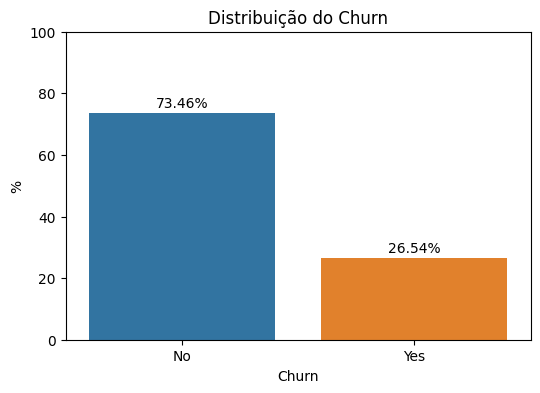

In [8]:
# Distribuição do Churn

mf.bar_plot('churn', df, title = 'Distribuição do Churn', xlabel = 'Churn')

Podemos ver que realmente há um alto percentual de Churn, tendo em vista que um percentual aceitável seria entre 5% e 7% de acordo com o Bessemer Venture Partners - BVP.

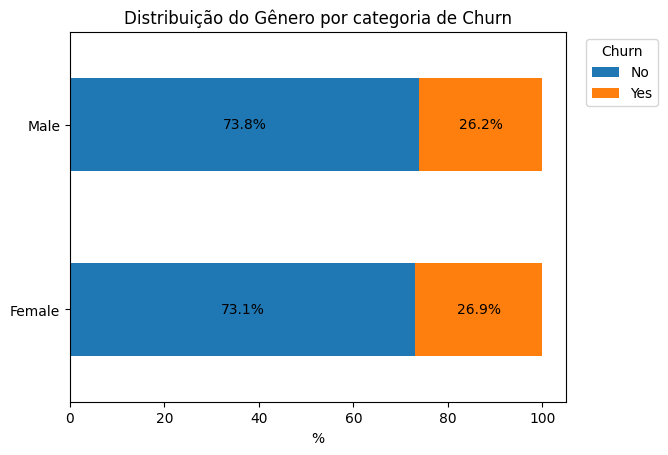

In [9]:
# Gráfico de barras empilhado: Gênero vs Churn

mf.stacked_bar(
    'gender', 
    'churn', 
    df, 
    title = 'Distribuição do Gênero por categoria de Churn', 
    legend_title = 'Churn', 
    position = (1.2, 1)
)

In [10]:
# Teste Qui-Quadrado: Gênero vs Churn

mf.chi2_test('gender', 'churn', df)

########## Resultados do Teste ########## 

Estatística Chi2: 0.484 
p-valor: 0.487


De acordo com o gráfico, podemos ver que o percentual de Churn é praticamente o mesmo entre os gêneros, de modo que temos indícios para acreditar que o gênero não está associado ao Churn, e isso pode ser confirmado através do resultado do teste estatístico.

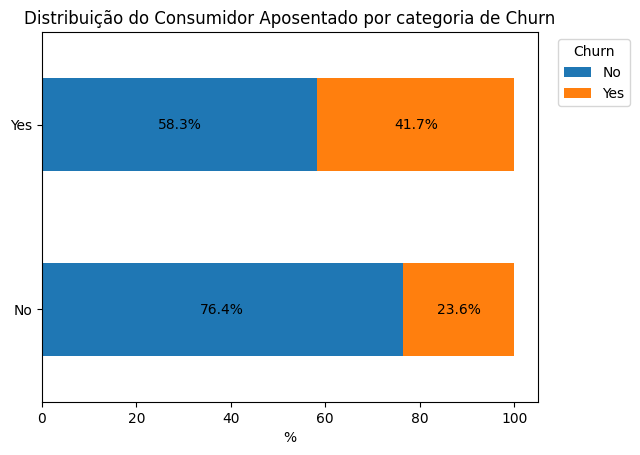

In [11]:
# Gráfico de barras empilhado: Consumidor Aposentado vs Churn

mf.stacked_bar(
    'seniorcitizen', 
    'churn', 
    df, 
    title = 'Distribuição do Consumidor Aposentado por categoria de Churn', 
    legend_title = 'Churn', 
    position = (1.2, 1)
)

In [12]:
# Teste Qui-Quadrado: Consumidor Aposentado vs Churn

mf.chi2_test('seniorcitizen', 'churn', df)

########## Resultados do Teste ########## 

Estatística Chi2: 159.426 
p-valor: < 0.001


De acordo com o gráfico, podemos ver que o percentual de Churn varia consideravelmente quando comparamos entre os consumidores aposentados e não aposentado. Nesse sentido, temos indícios para acreditar que o consumidor aposentado tem uma chance maior de Churn em relação ao não aposentado, e isso pode ser confirmado pelo resultado do teste estatístico.

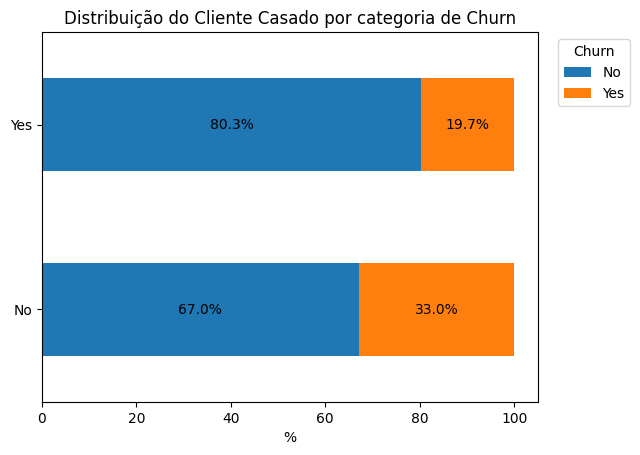

In [13]:
# Gráfico de barras empilhado: Cliente Casado vs Churn

mf.stacked_bar(
    'partner', 
    'churn', 
    df, 
    title = 'Distribuição do Cliente Casado por categoria de Churn', 
    legend_title = 'Churn', 
    position = (1.2, 1)
)

In [14]:
# Teste Qui-Quadrado: Cliente Casado vs Churn

mf.chi2_test('partner', 'churn', df)

########## Resultados do Teste ########## 

Estatística Chi2: 158.733 
p-valor: < 0.001


De acordo com o gráfico, podemos ver que o percentual de Churn varia consideravelmente quando comparamos entre os clientes casados e não casados. Nesse sentido, temos indícios para acreditar que o cliente não casado tem uma chance maior de Churn em relação ao casado, e isso pode ser confirmado pelo resultado do teste estatístico.

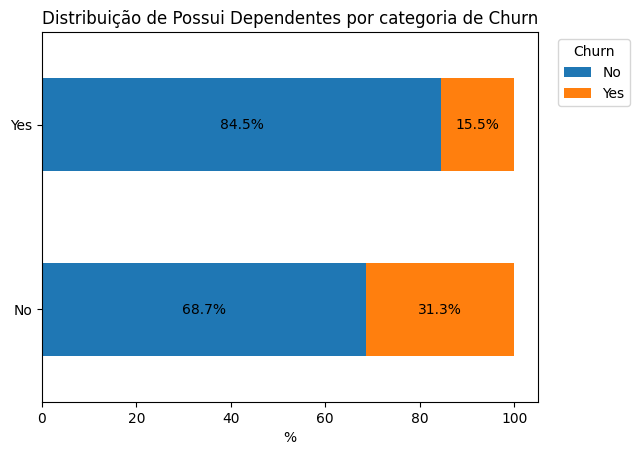

In [15]:
# Gráfico de barras empilhado: Possui Dependentes vs Churn

mf.stacked_bar(
    'dependents', 
    'churn', 
    df, 
    title = 'Distribuição de Possui Dependentes por categoria de Churn', 
    legend_title = 'Churn', 
    position = (1.2, 1)
)

In [16]:
# Teste Qui-Quadrado: Possui Dependentes vs Churn

mf.chi2_test('dependents', 'churn', df)

########## Resultados do Teste ########## 

Estatística Chi2: 189.129 
p-valor: < 0.001


De acordo com o gráfico, podemos ver que o percentual de Churn varia consideravelmente quando comparamos entre os clientes que possuem dependentes e os que não possuem. Nesse sentido, temos indícios para acreditar que o cliente que não possui dependentes tem uma chance maior de Churn em relação ao que possui dependentes, e isso pode ser confirmado pelo resultado do teste estatístico.

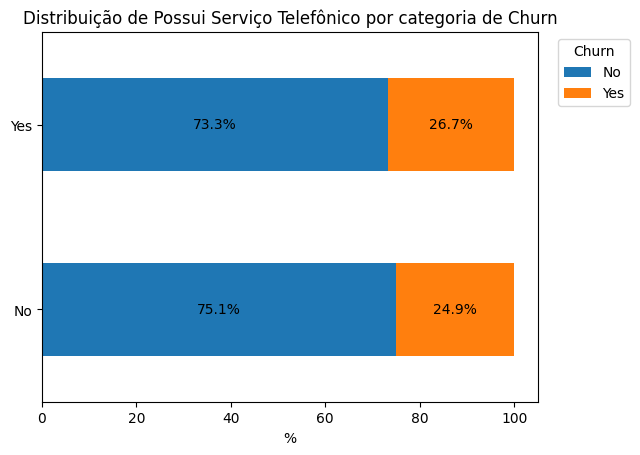

In [17]:
# Gráfico de barras empilhado: Possui Serviço Telefônico vs Churn

mf.stacked_bar(
    'phoneservice', 
    'churn', 
    df, 
    title = 'Distribuição de Possui Serviço Telefônico por categoria de Churn', 
    legend_title = 'Churn', 
    position = (1.2, 1)
)

In [18]:
# Teste Qui-Quadrado: Possui Serviço Telefônico vs Churn

mf.chi2_test('phoneservice', 'churn', df)

########## Resultados do Teste ########## 

Estatística Chi2: 0.915 
p-valor: 0.339


De acordo com o gráfico, podemos ver que o percentual de Churn é praticamente o mesmo entre os clientes que pssuem serviço telefônicos e os que não possuem, de modo que temos indícios para acreditar que o fato do cliente possuir serviço telefônico não está associado ao Churn, e isso pode ser confirmado através do resultado do teste estatístico.

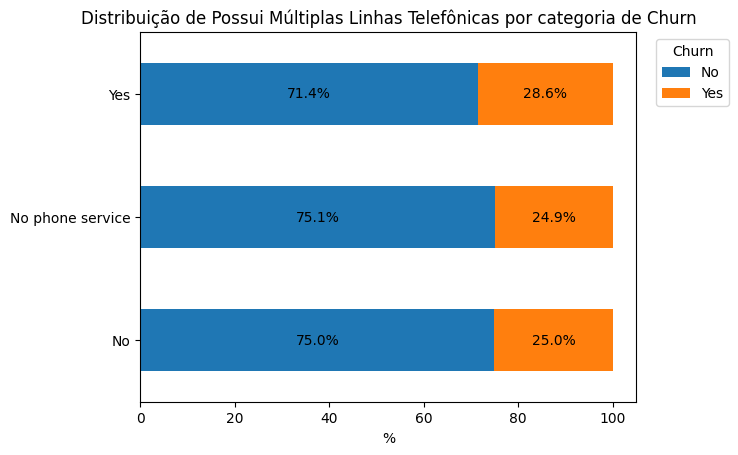

In [19]:
# Gráfico de barras empilhado: Possui Múltiplas Linhas Telefônicas vs Churn

mf.stacked_bar(
    'multiplelines', 
    'churn', 
    df, 
    title = 'Distribuição de Possui Múltiplas Linhas Telefônicas por categoria de Churn', 
    legend_title = 'Churn', 
    position = (1.2, 1)
)

In [20]:
# Teste Qui-Quadrado: Possui Múltiplas Linhas Telefônicas vs Churn

mf.chi2_test('multiplelines', 'churn', df)

########## Resultados do Teste ########## 

Estatística Chi2: 11.33 
p-valor: 0.003


De acordo com o gráfico, podemos perceber uma diferença sutil no percentual de Churn entre os clientes que possuem múltiplas linhas telefônicas e os que não possuem. Entretanto, o teste estatístico realizado mostra que essa diferença é significativa, o que nos leva a acreditar que há uma certa associação entre o fato do cliente possuir múltiplas linhas telefônicas e o Churn, de modo que aqueles que possuem múltiplas linhas telefônicas têm uma chance maior de Churn.

Entretanto, como a diferença entre os percentuais é bem sutil, faz-se necessário avaliar melhor a associação entre as variáveis.

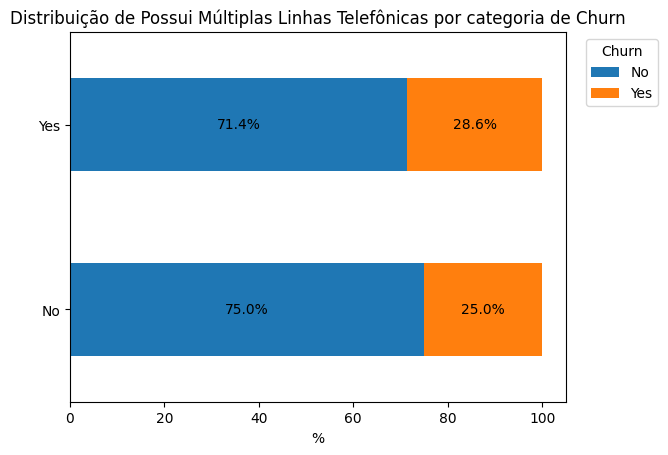

In [21]:
# Gráfico de barras empilhado: Possui Múltiplas Linhas Telefônicas vs Churn (sem a categoria "No phone service")

mf.stacked_bar(
    'multiplelines', 
    'churn', 
    df[df['multiplelines'] != 'No phone service'], 
    title = 'Distribuição de Possui Múltiplas Linhas Telefônicas por categoria de Churn', 
    legend_title = 'Churn', 
    position = (1.2, 1)
)

In [22]:
# Teste Qui-Quadrado: Possui Múltiplas Linhas Telefônicas vs Churn (sem a categoria "No phone service")

mf.chi2_test('multiplelines', 'churn', df[df['multiplelines'] != 'No phone service'])

########## Resultados do Teste ########## 

Estatística Chi2: 10.102 
p-valor: 0.001


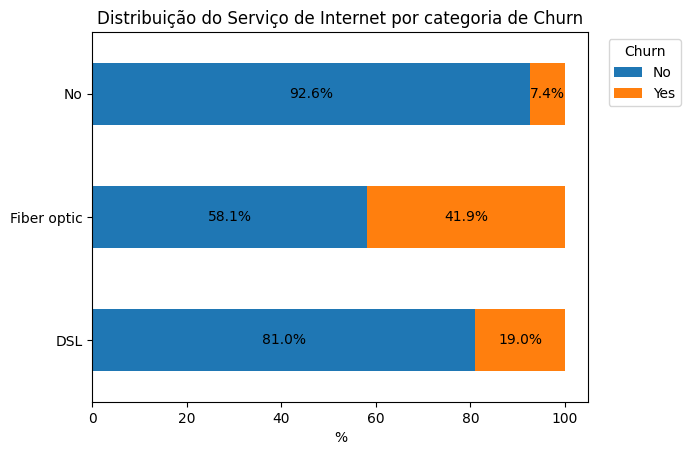

In [23]:
# Gráfico de barras empilhado: Serviço de Internet vs Churn

mf.stacked_bar(
    'internetservice', 
    'churn', 
    df, 
    title = 'Distribuição do Serviço de Internet por categoria de Churn', 
    legend_title = 'Churn', 
    position = (1.2, 1)
)

In [24]:
# Teste Qui-Quadrado: Serviço de Internet vs Churn

mf.chi2_test('internetservice', 'churn', df)

########## Resultados do Teste ########## 

Estatística Chi2: 732.31 
p-valor: < 0.001


De acordo com o gráfico, podemos ver que o percentual de Churn varia consideravelmente quando comparamos entre os tipos de serviço de internet. Nesse sentido, temos indícios para acreditar que o cliente que o cliente que possui o serviço com fibra óptica possui uma chance maior de Churn em relação ao que possuem o serviço DSL, e isso pode ser confirmado pelo resultado do teste estatístico.

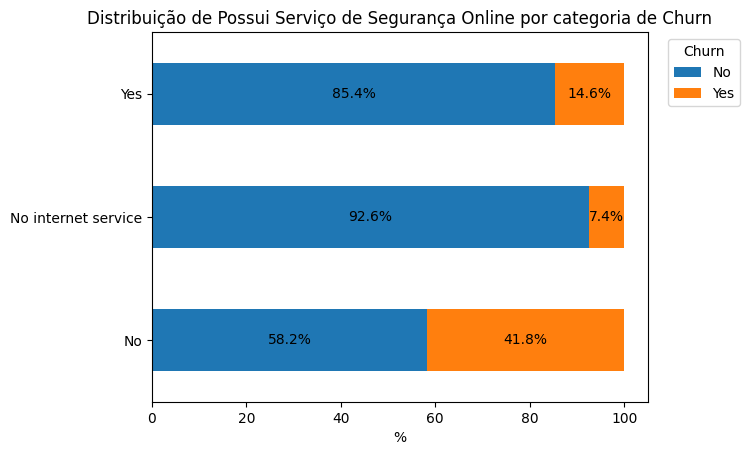

In [25]:
# Gráfico de barras empilhado: Possui Serviço de Segurança Online vs Churn

mf.stacked_bar(
    'onlinesecurity', 
    'churn', 
    df, 
    title = 'Distribuição de Possui Serviço de Segurança Online por categoria de Churn', 
    legend_title = 'Churn', 
    position = (1.2, 1)
)

In [26]:
# Teste Qui-Quadrado: Possui Serviço de Segurança Online vs Churn

mf.chi2_test('onlinesecurity', 'churn', df)

########## Resultados do Teste ########## 

Estatística Chi2: 849.999 
p-valor: < 0.001


De acordo com o gráfico, podemos ver que o percentual de Churn varia consideravelmente quando comparamos entre os clientes que possuem e não possuem serviço de segurança online. Nesse sentido, temos indícios para acreditar que o cliente que não possui serviço de segurança online tem uma chance maior de Churn quando comparado com os que possuem, e isso pode ser confirmado pelo resultado do teste estatístico.

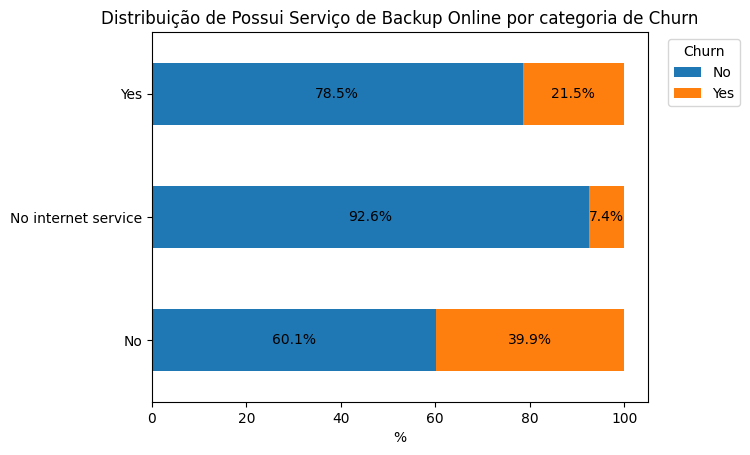

In [27]:
# Gráfico de barras empilhado: Possui Serviço de Backup Online vs Churn

mf.stacked_bar(
    'onlinebackup', 
    'churn', 
    df, 
    title = 'Distribuição de Possui Serviço de Backup Online por categoria de Churn', 
    legend_title = 'Churn', 
    position = (1.2, 1)
)

In [28]:
# Teste Qui-Quadrado: Possui Serviço de Segurança Online vs Churn

mf.chi2_test('onlinebackup', 'churn', df)

########## Resultados do Teste ########## 

Estatística Chi2: 601.813 
p-valor: < 0.001


De acordo com o gráfico, podemos ver que o percentual de Churn varia consideravelmente quando comparamos entre os clientes que possuem e não possuem serviço de backup online. Nesse sentido, temos indícios para acreditar que o cliente que não possui serviço de backup online tem uma chance maior de Churn quando comparado com os que possuem, e isso pode ser confirmado pelo resultado do teste estatístico.

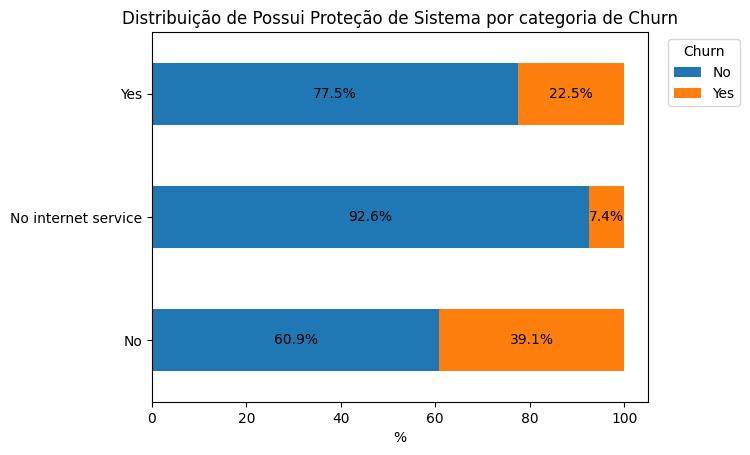

In [29]:
# Gráfico de barras empilhado: Possui Proteção de Sistema vs Churn

mf.stacked_bar(
    'deviceprotection', 
    'churn', 
    df, 
    title = 'Distribuição de Possui Proteção de Sistema por categoria de Churn', 
    legend_title = 'Churn', 
    position = (1.2, 1)
)

In [30]:
# Teste Qui-Quadrado: Possui Proteção de Sistema vs Churn

mf.chi2_test('deviceprotection', 'churn', df)

########## Resultados do Teste ########## 

Estatística Chi2: 558.419 
p-valor: < 0.001


De acordo com o gráfico, podemos ver que o percentual de Churn varia consideravelmente quando comparamos entre os clientes que possuem e não possuem proteção de sistema. Nesse sentido, temos indícios para acreditar que o cliente que não possui proteção de sistema tem uma chance maior de Churn quando comparado com os que possuem, e isso pode ser confirmado pelo resultado do teste estatístico.

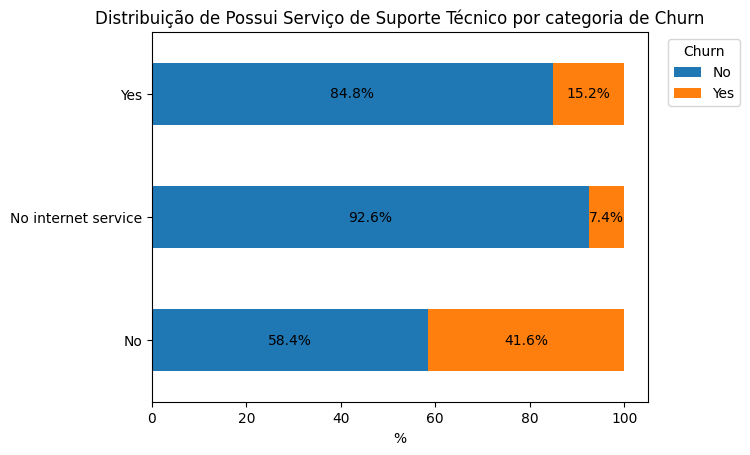

In [31]:
# Gráfico de barras empilhado: Possui Serviço de Suporte Técnico vs Churn

mf.stacked_bar(
    'techsupport', 
    'churn', 
    df, 
    title = 'Distribuição de Possui Serviço de Suporte Técnico por categoria de Churn', 
    legend_title = 'Churn', 
    position = (1.2, 1)
)

In [32]:
# Teste Qui-Quadrado: Possui Serviço de Suporte Técnico vs Churn

mf.chi2_test('techsupport', 'churn', df)

########## Resultados do Teste ########## 

Estatística Chi2: 828.197 
p-valor: < 0.001


De acordo com o gráfico, podemos ver que o percentual de Churn varia consideravelmente quando comparamos entre os clientes que possuem e não possuem serviço de suporte técnico. Nesse sentido, temos indícios para acreditar que o cliente que não possui serviço de suporte técnico tem uma chance maior de Churn quando comparado com os que possuem, e isso pode ser confirmado pelo resultado do teste estatístico.

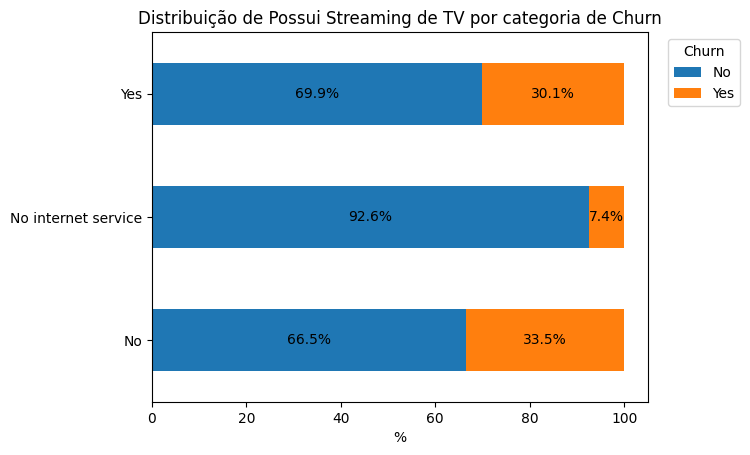

In [33]:
# Gráfico de barras empilhado: Possui Streaming de TV vs Churn

mf.stacked_bar(
    'streamingtv', 
    'churn', 
    df, 
    title = 'Distribuição de Possui Streaming de TV por categoria de Churn', 
    legend_title = 'Churn', 
    position = (1.2, 1)
)

In [34]:
# Teste Qui-Quadrado: Possui Streaming de TV vs Churn

mf.chi2_test('streamingtv', 'churn', df)

########## Resultados do Teste ########## 

Estatística Chi2: 374.204 
p-valor: < 0.001


Apesar o teste estatístico ter mostrado associação significativa entre as variáveis, podemos perceber que a diferença no percentual de Churn entre os que possuem e não possuem streaming de TV é bem sutil, o que nos dá indícios de uma fraca associação, se realmente houver.

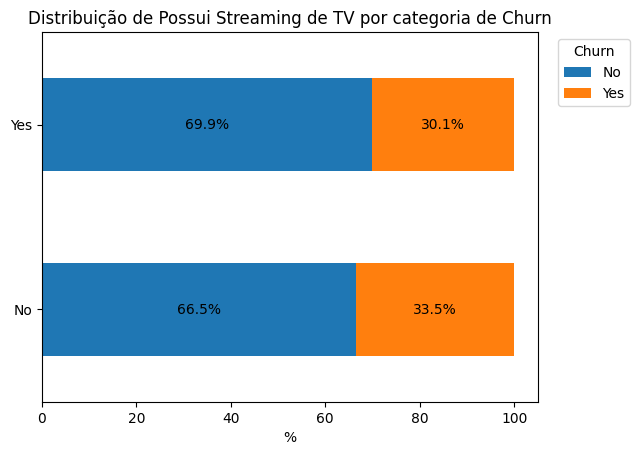

In [35]:
# Gráfico de barras empilhado: Possui Streaming de TV vs Churn (sem a categoria "No internet service")

mf.stacked_bar(
    'streamingtv', 
    'churn', 
    df[df['streamingtv'] != 'No internet service'], 
    title = 'Distribuição de Possui Streaming de TV por categoria de Churn', 
    legend_title = 'Churn', 
    position = (1.2, 1)
)

In [36]:
# Teste Qui-Quadrado: Possui Streaming de TV vs Churn (sem a categoria "No internet service")

mf.chi2_test('streamingtv', 'churn', df[df['streamingtv'] != 'No internet service'])

########## Resultados do Teste ########## 

Estatística Chi2: 7.418 
p-valor: 0.006


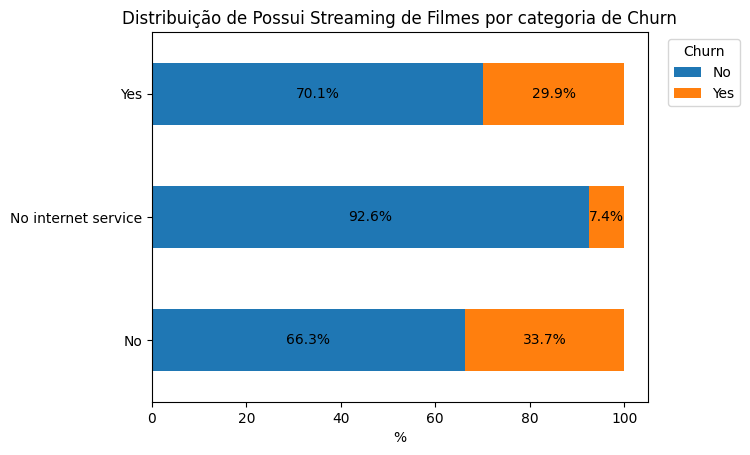

In [37]:
# Gráfico de barras empilhado: Possui Streaming de Filmes vs Churn

mf.stacked_bar(
    'streamingmovies', 
    'churn', 
    df, 
    title = 'Distribuição de Possui Streaming de Filmes por categoria de Churn', 
    legend_title = 'Churn', 
    position = (1.2, 1)
)

In [38]:
# Teste Qui-Quadrado: Possui Streaming de Filmes vs Churn

mf.chi2_test('streamingmovies', 'churn', df)

########## Resultados do Teste ########## 

Estatística Chi2: 375.661 
p-valor: < 0.001


Apesar o teste estatístico ter mostrado associação significativa entre as variáveis, podemos perceber que a diferença no percentual de Churn entre os que possuem e não possuem streaming de filmes é bem sutil, o que nos dá indícios de uma fraca associação, se realmente houver.

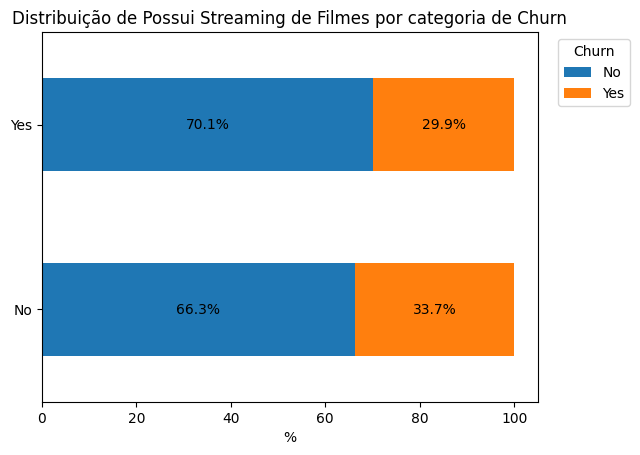

In [39]:
# Gráfico de barras empilhado: Possui Streaming de Filmes vs Churn (sem a categoria "No internet service")

mf.stacked_bar(
    'streamingmovies', 
    'churn', 
    df[df['streamingmovies'] != 'No internet service'], 
    title = 'Distribuição de Possui Streaming de Filmes por categoria de Churn', 
    legend_title = 'Churn', 
    position = (1.2, 1)
)

In [40]:
# Teste Qui-Quadrado: Possui Streaming de Filmes vs Churn (sem a categoria "No internet service")

mf.chi2_test('streamingmovies', 'churn', df[df['streamingmovies'] != 'No internet service'])

########## Resultados do Teste ########## 

Estatística Chi2: 8.714 
p-valor: 0.003


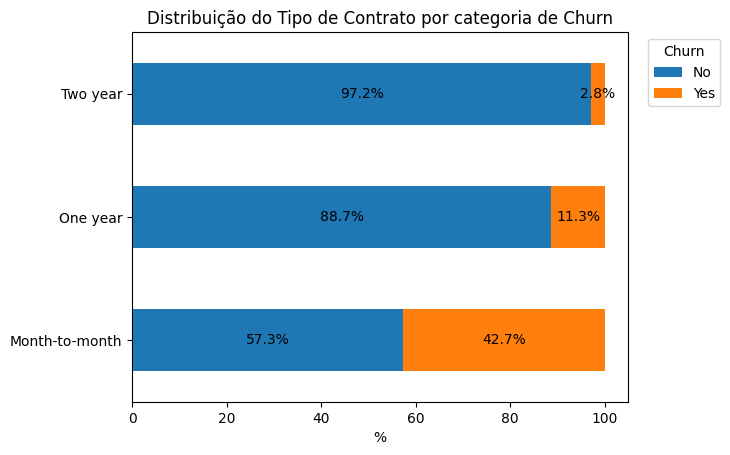

In [41]:
# Gráfico de barras empilhado: Tipo de Contrato vs Churn

mf.stacked_bar(
    'contract', 
    'churn', 
    df, 
    title = 'Distribuição do Tipo de Contrato por categoria de Churn', 
    legend_title = 'Churn', 
    position = (1.2, 1)
)

In [42]:
# Teste Qui-Quadrado: Tipo de Contrato vs Churn

mf.chi2_test('contract', 'churn', df)

########## Resultados do Teste ########## 

Estatística Chi2: 1184.597 
p-valor: < 0.001


De acordo com o gráfico, podemos ver que o percentual de Churn varia consideravelmente quando comparamos entre os tipos de contrato. Nesse sentido, temos indícios para acreditar que o cliente que possui contrato mensal possui uma chance maior de Churn quando comparado aos demais tipos, e isso pode ser confirmado pelo resultado do teste estatístico.

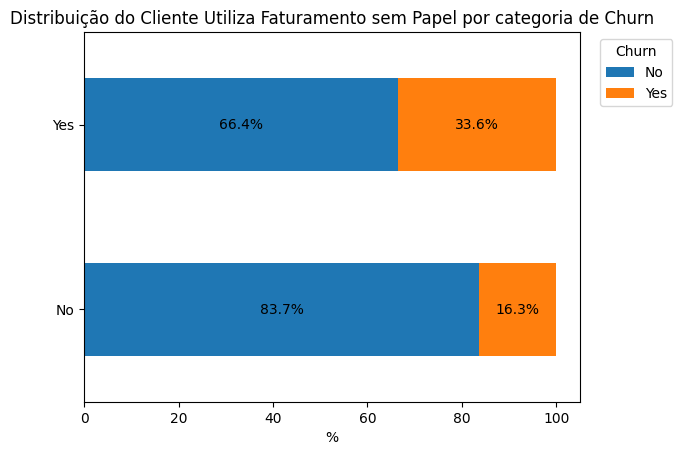

In [43]:
# Gráfico de barras empilhado: Cliente Utiliza Faturamento sem Papel vs Churn

mf.stacked_bar(
    'paperlessbilling', 
    'churn', 
    df, 
    title = 'Distribuição do Cliente Utiliza Faturamento sem Papel por categoria de Churn', 
    legend_title = 'Churn', 
    position = (1.2, 1)
)

In [44]:
# Teste Qui-Quadrado: Faturamento sem Papel vs Churn

mf.chi2_test('paperlessbilling', 'churn', df)

########## Resultados do Teste ########## 

Estatística Chi2: 258.278 
p-valor: < 0.001


De acordo com o gráfico, podemos ver que o percentual de Churn varia consideravelmente quando comparamos entre os clientes que utilizam e não utilizam faturamento sem papel. Nesse sentido, temos indícios para acreditar que o cliente que utiliza faturamento sem papel possui uma chance maior de Churn quando comparado ao que não utiliza, e isso pode ser confirmado pelo resultado do teste estatístico.

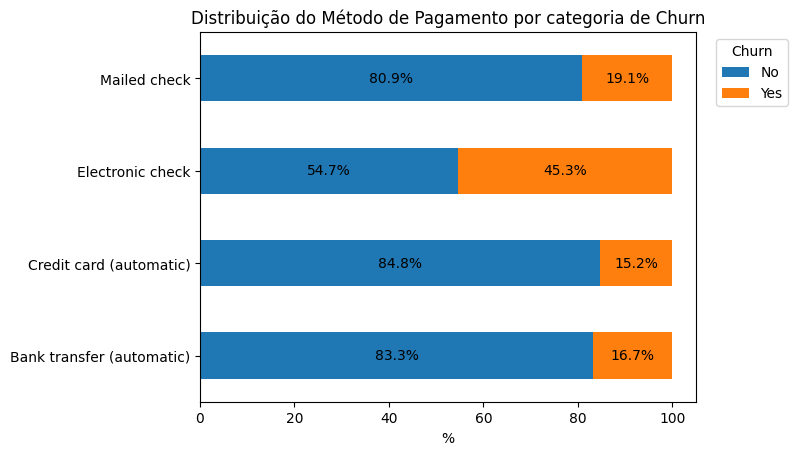

In [45]:
# Gráfico de barras empilhado: Método de Pagamento vs Churn

mf.stacked_bar(
    'paymentmethod', 
    'churn', 
    df, 
    title = 'Distribuição do Método de Pagamento por categoria de Churn', 
    legend_title = 'Churn', 
    position = (1.2, 1)
)

In [46]:
# Teste Qui-Quadrado: Método de Pagamento vs Churn

mf.chi2_test('paymentmethod', 'churn', df)

########## Resultados do Teste ########## 

Estatística Chi2: 648.142 
p-valor: < 0.001


De acordo com o gráfico, podemos ver que o percentual de Churn varia consideravelmente quando comparamos entre os métodos de pagamento. Nesse sentido, temos indícios para acreditar que os clientes que pagam por métodos automáticos têm uma chance menor de Churn em relação aos clientes que pagam por outros métodos de pagamento, e isso pode ser confirmado pelo resultado do teste estatístico.

### Análise exploratória para as variáveis quantitativas

In [47]:
# Medidas descritivas e teste estatístico: Quantidade de meses que a pessoa é cliente vs Churn

mf.t_test(df, 'tenure', 'churn')

########## Medidas Descritivas ########## 

         n  min    q1    mean  median    q3      sd  max
No   5174    0  15.0  37.570    38.0  61.0  24.114   72
Yes  1869    1   2.0  17.979    10.0  29.0  19.531   72 


########## Resultados do Teste ########## 

Estatística t: 31.58 
p-valor: < 0.001


De acordo com as medidas descritivas e o teste estatístico realizado, temos que, em média, as pessoas que são clientes da empresa a menos tempo têm uma chance maior de Churn.

In [48]:
# Medidas descritivas e teste estatístico: Pagamento mensal atual vs Churn

mf.t_test(df, 'monthlycharges', 'churn')

########## Medidas Descritivas ########## 

         n    min     q1    mean  median    q3      sd     max
No   5174  18.25  25.10  61.265  64.425  88.4  31.093  118.75
Yes  1869  18.85  56.15  74.441  79.650  94.2  24.666  118.35 


########## Resultados do Teste ########## 

Estatística t: -16.537 
p-valor: < 0.001


De acordo com as medidas descritivas e o teste estatístico realizado, temos que, em média, as pessoas que pagam mais mensalmente têm uma chance maior de Churn.

In [49]:
# Medidas descritivas e teste estatístico: Valor total já pago pelo cliente vs Churn

mf.t_test(df, 'totalcharges', 'churn')

########## Medidas Descritivas ########## 

         n    min       q1      mean   median        q3        sd      max
No   5163  18.80  577.825  2555.344  1683.60  4264.125  2329.457  8672.45
Yes  1869  18.85  134.500  1531.796   703.55  2331.300  1890.823  8684.80 


########## Resultados do Teste ########## 

Estatística t: 17.069 
p-valor: < 0.001


Os resultados apresentado corroboram com os resultados aprensentado para a variável "tenure".